# Assuming 'optimizer' is your optimizer
   scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    step_size: Number of epochs after which to adjust the learning rate.
    gamma: Factor by which to multiply the learning rate. In this example, it's reduced by a factor of 10 every 10 epochs.

for epoch in range(num_epochs):
       train_loss = train_batch(model_n, train_loader, optimizer, criterion, device)
       val_loss = validate_batch(model_n, val_loader, criterion, device)
       print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
       
       # Update the learning rate
       scheduler.step()

import clearml
clearml.browser_login()
from clearml import Task


In [1]:

from ultralytics import YOLO
model_path = "/home/administrador/Documents/S-YOLO/cfg/models/v8/"
data_path = "/home/administrador/Documents/S-YOLO/cfg/datasets/"  

models = f"{model_path}yolov8.yaml"
models = f"{model_path}yolov8-REMCSPPF.yaml"
models = f"{model_path}yolov8-CNV.yaml" #Good result with Wise-IoU
models = f"{model_path}yolov8-LSKC2f.yaml"
models = f"{model_path}yolov8-CNB_SE.yaml" # To be run
#models = f"{model_path}11/yolo11n.yaml" # To be run
#models = f"{model_path}yolov8-RFEM_SE.yaml" # To be run
#models = f"{model_path}best.pt" # To be run

print(models)

# Load a model
model = YOLO(models)  # build a new model from YAML

# Train the model
results = model.train(data=f"{data_path}custom_data88.yaml", epochs=100, imgsz=640, augment=True, project='runs/detect/')

/home/administrador/anaconda3/envs/yolov8custom/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


/home/administrador/Documents/S-YOLO/cfg/models/v8/best.pt


/home/administrador/anaconda3/envs/yolov8custom/lib/python3.10/site-packages/ultralytics/nn/tasks.py:533: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(fil

2024-12-24 13:09:33,597 - clearml.Repository Detection - WARNING - Could not read Jupyter Notebook: No module named 'nbconvert'
2024-12-24 13:09:33,598 - clearml.Repository Detection - WARNING - Please install nbconvert using "pip install nbconvert"


Action failed <400/801: projects.create/v1.0 (Project with the same name already exists: name=runs/detect, company=005b7c6294a64cae8084722e5b922cbb)> (name=runs/detect/, description=)
Action failed <400/801: projects.create/v1.0 (Project with the same name already exists: name=runs/detect, company=005b7c6294a64cae8084722e5b922cbb)> (name=runs/detect/, description=)
WARNING ⚠️ ClearML installed but not initialized correctly, not logging this run. Action failed <400/801: projects.create/v1.0 (Project with the same name already exists: name=runs/detect, company=005b7c6294a64cae8084722e5b922cbb)> (name=runs/detect/, description=)
Freezing layer 'model.26.dfl.conv.weight'
/home/administrador/anaconda3/envs/yolov8custom/lib/python3.10/site-packages/ultralytics/engine/trainer.py:253: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = amp.GradScaler(enabled=self.amp)
train: Scanning /home/administrador/

Plot saved to: ./runs/detect/mAP50Comparison18-12.png


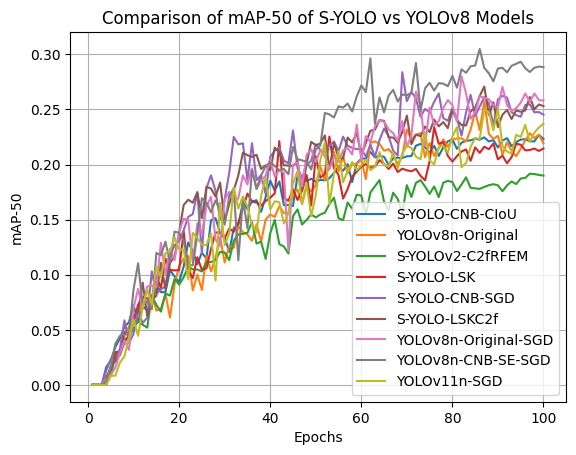

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import os

# Define paths to your results CSV files
results_file_path_1 = '../model_run/runs/detect/train2/results.csv'  # Model 1 results file
results_file_path_2 = '../model_run/runs/detect/train/results.csv'  # Model 2 results file
results_file_path_3 = '../model_run/runs/detect/train4/results.csv'  # Model 1 results file
results_file_path_4 = '../run/runs/detect/train/results.csv'  # Model 1 results file
results_file_path_5 = './runs/detect/train2/results.csv'  # Model 1 results file
results_file_path_6 = './runs/detect/train/results.csv'  # YOLOv8n-Original-SGD
results_file_path_7 = './runs/detect/train3/results.csv'  # S-YOLO-LSKC2f
results_file_path_8 = './runs/detect/train4/results.csv'  # YOLOv8n-CNB-SE-SGD
results_file_path_9 = './runs/detect/train6/results.csv'  # yolov11-SGD


# Get mAP50 values and max value from result CSV files
def get_map50_values(results_path):
    try:
        data = pd.read_csv(results_path)
        # Check if either column name exists
        if '       metrics/mAP50(B)' in data.columns:
            map50_values = data['       metrics/mAP50(B)'].tolist()
            map50 = data['       metrics/mAP50(B)'].max()
        elif 'metrics/mAP50(B)' in data.columns:
            map50_values = data['metrics/mAP50(B)'].tolist()
            map50 = data['metrics/mAP50(B)'].max()
        else:
            print("Column 'mAP50' not found in the CSV file.")
            return []  # Or handle the error differently
        return map50_values, map50 # return map50 values and maximum value

    except FileNotFoundError:
        print(f"CSV file not found at path: {results_path}")
        return []  # Or handle the error differently
#Save plot
def save_plot_with_data(folder_path, version, fig):
    """Saves the plot with data to the specified folder.

    Args:
        folder_path: The path to the folder where the plot will be saved.
        version: The version number to include in the file name.
        fig: The matplotlib figure to save.
    """
    file_name = f'mAP50Comparison{version}-12.png'
    file_path = os.path.join(folder_path, file_name)
    fig.savefig(file_path)
    print(f"Plot saved to: {file_path}")

#results_file_path_1 = 'runs/detect/train/results.csv'  # Model 1 results file
current_dir = pathlib.Path.cwd() 
parent_dir = current_dir.parent
#results_file_path_2 = parent_dir /'runs/detect/train/results.csv'  # Model 2 results file


# Get mAP50 values and max value of eatch model
map50_SYolo, maxmap50_SYolo, = get_map50_values(results_file_path_1)
map50_Yolov8n, maxmap50_Yolov8n = get_map50_values(results_file_path_2)
map50_SYolov2, maxmap50_SYolov2 = get_map50_values(results_file_path_3)
map50_SYolov3, maxmap50_SYolov3 = get_map50_values(results_file_path_4)
map50_SYolov4, maxmap50_SYolov4 = get_map50_values(results_file_path_5)
map50_Yolov8nSGD, maxmap50_Yolov8nSGD = get_map50_values(results_file_path_6)
map50_SYolov5, maxmap50_SYolov5  = get_map50_values(results_file_path_7)
map50_SYolov6, maxmap50_SYolov6 = get_map50_values(results_file_path_8)
map50_Yolov11nSGD, maxmap50_Yolov11nSGD = get_map50_values(results_file_path_9)


# Define the range of epochs (adjust as needed)
num_epochs = len(map50_SYolov4) 
epochs = range(1, num_epochs + 1)

# Plotting the mAP50 curves
plt.plot(epochs, map50_SYolo, label='S-YOLO-CNB-CIoU')
plt.plot(epochs, map50_Yolov8n, label='YOLOv8n-Original')
plt.plot(epochs, map50_SYolov2, label='S-YOLOv2-C2fRFEM')
plt.plot(epochs, map50_SYolov3, label='S-YOLO-LSK')
plt.plot(epochs, map50_SYolov4, label='S-YOLO-CNB-SGD')
plt.plot(epochs, map50_SYolov5, label='S-YOLO-LSKC2f')
plt.plot(epochs, map50_Yolov8nSGD, label='YOLOv8n-Original-SGD')
plt.plot(epochs, map50_SYolov6, label='YOLOv8n-CNB-SE-SGD')
plt.plot(epochs, map50_Yolov11nSGD, label='YOLOv11n-SGD')

version = 18
# Add labels and title
plt.xlabel('Epochs')
#plt.ylabel('mAP-50 (%)')
plt.ylabel('mAP-50')
plt.title('Comparison of mAP-50 of S-YOLO vs YOLOv8 Models')

# Add a legend
plt.legend()
plt.grid(True)

# Specify and create the folder path
folder_path = './runs/detect'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# get current figure
fig = plt.gcf() 

# Save the plot with data to the specified folder
#plt.savefig(os.path.join(folder_path, 'mAP50Comparison{version}-12.png'))
save_plot_with_data(folder_path, version, fig)

# Show the plot
plt.show()


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import os

# Define paths to your results CSV files
results_file_path_1 = '../model_run/runs/detect/train2/results.csv'  # Model 1 results file
results_file_path_2 = '../model_run/runs/detect/train/results.csv'  # Model 2 results file
results_file_path_3 = '../model_run/runs/detect/train4/results.csv'  # Model 1 results file
results_file_path_4 = '../run/runs/detect/train/results.csv'  # Model 1 results file
results_file_path_5 = './runs/detect/train2/results.csv'  # Model 1 results file
results_file_path_6 = './runs/detect/train/results.csv'  # Model 1 results file
results_file_path_7 = './runs/detect/train3/results.csv'  # Model 1 results file
results_file_path_8 = './runs/detect/train4/results.csv'  # Model 1 results file

version = 8

# Function to extract mAP@0.5 from a CSV file
def get_map50(file_path):
  try:
    df = pd.read_csv(file_path)
    map50_column = df['       metrics/mAP50(B)']

     # Extract the last value and handle potential lists/tuples
    map50_value = map50_column.iloc[-1]
    map50 = 0
    # Check if the extracted value is a sequence
    # Check if the extracted value is a sequence
    if isinstance(map50_value, (list, tuple, np.ndarray)):
      # If it's a sequence, take the last element (or first if last is not available)
      try:
        map50 = float(map50_value[-1]) if not isinstance(map50_value[-1], float) else map50_value[-1]
      except (IndexError, TypeError):
        try:
          map50 = float(map50_value[0]) if not isinstance(map50_value[0], float) else map50_value[0]
        except (IndexError, TypeError):
          map50 = None  # Handle cases where extraction fails
    else:
      # If not a sequence, assume it's already a numeric value
      map50 = float(map50_value) if not isinstance(map50_value, float) else map50_value



    return map50
  except FileNotFoundError:
    print(f"File not found: {file_path}")
    return None

# Get mAP@0.5 for each model
map50_model1 = get_map50(results_file_path_1)
print(f"map50_model1 type: {type(map50_model1)}, value: {map50_model1}")
map50_model2 = get_map50(results_file_path_2)
print(f"map50_model2 type: {type(map50_model2)}, value: {map50_model2}")
map50_model3 = get_map50(results_file_path_3)
print(f"map50_model3 type: {type(map50_model3)}, value: {map50_model3}")
map50_model4 = get_map50(results_file_path_4)
print(f"map50_model4 type: {type(map50_model4)}, value: {map50_model4}")
map50_model5 = get_map50(results_file_path_5)
print(f"map50_model5 type: {type(map50_model5)}, value: {map50_model5}")
map50_model6 = get_map50(results_file_path_6)
print(f"map50_model6 type: {type(map50_model6)}, value: {map50_model6}")
map50_model7 = get_map50(results_file_path_7)
print(f"map50_model7 type: {type(map50_model7)}, value: {map50_model7}")
map50_model8 = get_map50(results_file_path_8)
print(f"map50_model8 type: {type(map50_model8)}, value: {map50_model8}")

# Store the results in a way for easy plotting
models = ['YOLOv8n-Original', 'YOLOv8n-Original-SGD','S-YOLOv2-C2fRFEM','S-YOLO-LSK', 'S-YOLO-LSKC2f', 'S-YOLO-CNB-CIoU', 'S-YOLO-CNB-SGD', 'YOLOv8n-CNB-SE-SGD']  # Model names
map50_values = [map50_Yolov8n, map50_Yolov8nSGD, map50_SYolov2, map50_SYolov3, map50_SYolov5, map50_SYolo,map50_SYolov4, map50_model8]  # Corresponding mAP@0.5 values

# Filter out any None values from map50_values
map50_values = [value for value in map50_values if value is not None]

# Convert the list to a numpy array
map50_values = np.array(map50_values)

# Print the shape and dtype of the array for debugging
print(f"Shape: {map50_values.shape}, dtype: {map50_values.dtype}")

# Check for None values and skip them
valid_models = []
valid_map50_values = []
print(f'model {len(models)} and model number {len(map50_values)}')
for i in range(len(models)):
    if map50_values[i] is not None:
        valid_models.append(models[i])
        valid_map50_values.append(map50_values[i])

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(valid_models, valid_map50_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'black']) 
plt.title('mAP@0.5 Comparison')
plt.ylabel('mAP@0.5')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for mAP
plt.grid(axis='y')

# Add the mAP@0.5 values as text on top of the bars
for i, v in enumerate(valid_map50_values):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.show()

map50_model1 type: <class 'numpy.float64'>, value: 0.22313
map50_model2 type: <class 'numpy.float64'>, value: 0.21926
map50_model3 type: <class 'numpy.float64'>, value: 0.18997
map50_model4 type: <class 'numpy.float64'>, value: 0.21457
map50_model5 type: <class 'numpy.float64'>, value: 0.24526
map50_model6 type: <class 'numpy.float64'>, value: 0.25832
map50_model7 type: <class 'numpy.float64'>, value: 0.25303
map50_model8 type: <class 'numpy.float64'>, value: 0.28842


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

In [ ]:
import numpy as np

# Get predictions from both models on your validation or test data
# Assuming 'val_data.yaml' is your data configuration file
results1 = model1.predict(data='val_data.yaml', save=True)  # Get predictions from model1
results2 = model2.predict(data='val_data.yaml', save=True)  # Get predictions from model2

# Extract IoU values from the results
iou_values1 = [] 
iou_values2 = []

# Loop through the predictions to get IoU for each detected object
for result in results1:  
    for *xyxy, conf, cls in result.boxes.data:
        # Assuming 'result.boxes.xywh' gives you the bounding box coordinates
        # and 'result.boxes.conf' gives you the confidence score
        iou_values1.append(result.boxes.iou())  # Replace with how you get IoU

for result in results2:
    for *xyxy, conf, cls in result.boxes.data:
        iou_values2.append(result.boxes.iou())  # Replace with how you get IoU

# Convert to NumPy arrays for easier handling
iou_values1 = np.concatenate(iou_values1, axis=0)
iou_values2 = np.concatenate(iou_values2, axis=0)

# Create histograms or box plots to compare IoU distributions
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(iou_values1, bins=20, alpha=0.5, label='Model 1')
plt.hist(iou_values2, bins=20, alpha=0.5, label='Model 2')
plt.title('IoU Distribution Comparison')
plt.xlabel('IoU')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Or, you can use box plots for a different visualization
# plt.boxplot([iou_values1, iou_values2], labels=['Model 1', 'Model 2'])
# plt.title('IoU Comparison')
# plt.ylabel('IoU')
# plt.show()

In [11]:
from ultralytics.utils.downloads import download
from pathlib import Path
import yaml
data_path = "/home/administrador/Documents/S-YOLO/cfg/datasets/"  

def download_coco_data(yaml_path, segments=True, threads=3):
    """Downloads COCO dataset labels and data.

    Args:
        yaml_path: Path to the YAML file containing dataset information.
        segments: Whether to download segment or box labels (default: True).
        threads: Number of threads to use for downloading data (default: 3).
    """

    with open(yaml_path, 'r') as f:
        try:
            yaml_data = yaml.safe_load(f)  # Load YAML data
        except yaml.YAMLError as exc:
            print(exc)
            return  # Or handle the error differently

    # Dataset root directory
    dir = Path(yaml_data['path']) 

    # Download labels
    url = 'https://github.com/ultralytics/assets/releases/download/v0.0.0/'
    urls = [url + ('coco2017labels-segments.zip' if segments else 'coco2017labels.zip')]
    download(urls, dir=dir.parent)

    # Download data
    urls = [
        'http://images.cocodataset.org/zips/train2017.zip',
        'http://images.cocodataset.org/zips/val2017.zip',
        'http://images.cocodataset.org/zips/test2017.zip'
    ]
    download(urls, dir=dir / 'images', threads=threads)

    print("COCO dataset downloaded successfully!")
yaml_path = f"{data_path}coco.yaml"  
download_coco_data(yaml_path)  # Downloads COCO dataset with segment labels and default 3 threads

100%|██████████| 169M/169M [00:15<00:00, 11.6MB/s] 
Unzipping ../datasets/coco2017labels-segments.zip to /home/administrador/Documents/S-YOLO/datasets/coco...: 100%|██████████| 122232/122232 [00:17<00:00, 7095.64file/s]


BadZipFile: Bad CRC-32 for file 'train2017/000000075173.jpg'